# NTD Proposed Changes 2025-2026 Analysis

Proposed Change Text:

https://www.federalregister.gov/documents/2024/10/31/2024-25341/national-transit-database-proposed-reporting-changes-and-clarifications-for-report-years-2025-and


Task:
- As Caltrans DDS prepare to submit comments of these proposed changes to NTD, the Data Science branch is tasked to address 3 areas the proposed changes may affect the branch.
- Analysis of the following areas to be submitted to the Transit Quality Branch by 11/27/2024

In [2]:
import pandas as pd

from calitp_data_analysis.tables import tbls
import geopandas as gpd
from siuba import _, collect, count, filter, show_query

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Area 1 - NTD Reporting Streamlining
>E: The first is on the topic of NTD reporting streamlining. There are `a few items being proposed that may add additional reporting burden` and `some that propose to streamline things`. Is this an area that you all have an opinion on?

>K: will take a look based on our understanding of `common past reporting errors identified in the NTD Modernization project` and provide some comments. 

>E: That sounds great

### <u>Revisit the NTD Modernization - Issues Analysis</u>
Slalom completed an analysis of the most common erorrs in NTD reporting for 2020, 2021 and 2022 by frequency, type and agency. 

As reported, 3 issues account for ~25% of all errors:
>1. RR20F-005: The cost per hour changed by 30% or more. 
>2. A10-033: The number of General Purpose Maintenance Facilities differs from previous year. 
>3. RR20F-146: The miles per vehicle changed by 20% or more.

Slalom identified a list of the top 23 errors by frequency and most comments to determine which errors should be prioritized first.

sorted by issue ID:

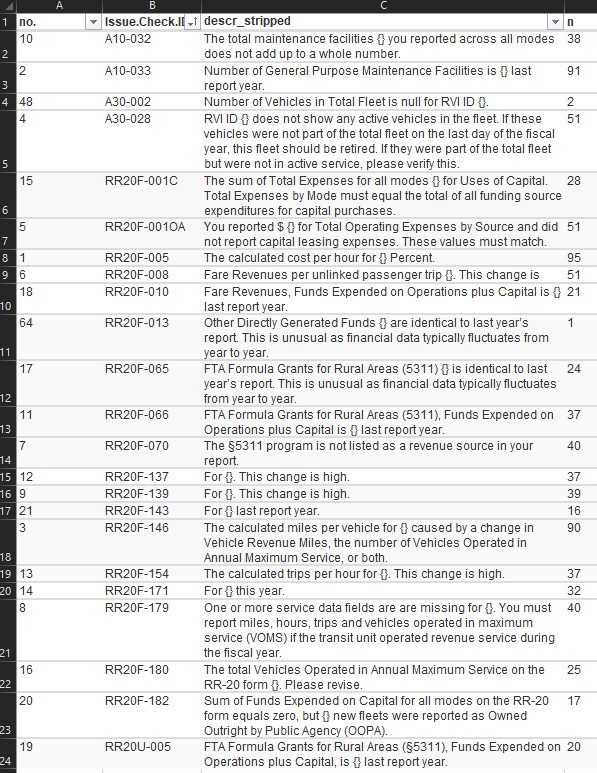
- 2x A10 errors
- 2x A30 errors
- 18x RR20F errors
- 1x RR20U errors

### <u>Notes from Proposed Changes document</u>

- **Sec B: increases reporting burden for all**
    - requires agencies to submit shapes.txt
    - align agency_id to NTD ID
    
- **Sec C: decreases reporting burden for all**
    - FTA acknowledges that the a15 and a10 is causing discrepanices
    - removes A-10 form
    - moves ADA data and other data from A-10 form to new extended A-15 form
    - clarifies what a "station" or "facility" is and how to count them for reporting
    - establish a standardize reporting method for passenger stations and facilities
    - **`Sec C directly relates to the issues analysis, A10 error was the 2nd more common error in reporting`**

- **Sec D: slight increase reporting burden for all**
    - proposes to add new categories to A-20 form:
    	1. “Track—Turntable,” 
		2. “Power and Signal—Pump Rooms”
        3. “Power and Signal—Fan Plants” 
    - Adds a "decade of construction" field to these category. this way FTA can more accurately capture an asset was reconstructed or renovated.

- **Sec E: may slightly increase reporting burden for some**
    - clarifies what counts as a cyber security event and adds more choices to better describe what type of event has happened
    - also expands what is IT infrastures and an heiarchy of events
    - I believe this reporting only applies IF the agency experiences a security event. So an agency who has not had any security events, will not have an increased reporting burden

- **Sec F: may slightly increase reporting burden for some**
    - revise the NTD major event reporting requirements to capture the new “disabling damage” event category
    - similar to Sec e, only applies if a safety event occurs

- **Sec G: decreases reporting burden for some**
    - there are some unique rural operators that operate in multiple, small areas, but have the full reporter status
    - proposes that these unique operators get a waiver to turn them into reduced reporters
    - FTA estimates this affects 10-15 agencies.

- **Sec H: may significantly increase reporting burden for some**
    - propose to have a new category in NTD reporting field to allow transit agencies to declare if they are a voluntary reporter or not
    - if a transit agency decides to become a voluntary reporter, they must complete the NTD report in its entirety. 
    - These reporters voluntarily comply with all NTD reporting requirements under the NTD rule (49 CFR Part 630) and the USOA.

## <u>Comments for Area 1</u>
Regarding the possible affects on the Data Science Branch, we have the biggest interest in Sections C and G as it affects NTD metrics we typically use in analyses.

Slalom conducted an analysis that looked into the types of reporting errors Caltrans received from NTD for 3 reporting years. The analysis found that Form A-10 errors were quite common. Section C of the proposed changes state that FTA is also awear of the issues in the A-10 and A-15 form. The proposed changes eliminates the A-10 entirely and moves some of the initial A-10 metrics over to a new, extended A-15 form. This change aims to reduce the reporting burden for transit agencies.

Sections G concerns changing rural operators with full reporter responsibilities to be reduced reporters. FTA aims to decrease the reporting burden, but this change affects an estimated 10-15 operators. going from full reporter to reduced reporters would mean the operator does not need to report data related to passenger miles or monthly service or safety stats


Section H proposes a change to the NTD reporting platform to include a field that identify Voluntary reporters. This slightly increases the reporting burden for all NTD reporters. Sections E and F may conditionally increase the reporting burden for some operators, if the operator experiences cyber security or safety events. Finally, Section D slightly incresses the reporting burden by proposing new categories in to A-20 form.




---

## Area 2 - Rural, Full Reporters to Reduced Reporters
> E: The second area is on the topic of NTD data coming through as a result of a `potential reduction in some full reporters in rural areas`. I’m not sure which ones these would be because the rulemaking wouldn’t affect all reporters. I’m also `not sure what data wouldn’t be reported as a result`. Is this something the analyst team can look into further… ie see if the proposed change in Section G would affect any California agencies and what data we may not receive from NTD as a result.

> K: `identify which CA agencies are full reporters in rural areas that meet the criteria in section G`, although I think we’d do it based on `2023 NTD data` and FTA would do it on 2024 data. I am not sure if there would be data loss based on FTA’s assessment that these agencies were historically Rural reporters.

> E: 2.	Yeah, I’m not expecting there would be much impact here, but perhaps it `could affect something like Fresno County` or something that provides a lot of rural service, but is large enough to be a full reporter. It’s worth flagging and understanding if it could be an impact or not. 

### <u>Understanding the difference between urban Full Reporters and urban Reduced Reporters</u>

Per NTD reporting manual
>Full Reporters must provide the Annual Report, as well as Monthly Ridership (MR) and monthly Safety and Security reports. All other reporter types file their reports on an annual basis.

>Full Reporters must report data for total revenues earned during the fiscal year. Reduced Reporters only report operating and capital expenditures incurred in the fiscal year, by source of revenue.

**List of form used by both Urban Full and Reduced Reporters:**
1. Basic Information (Form P-10)
2. Modes and Types of Service (Form P-20)
3. Reporter Users (Form P-30)
4. General Transit Feed Specification Data for Fixed Route Modes (Form P-50)
5. Identification (Form B-10)
6. Geospatial Data for Demand Response Modes (Form B-15)
7. Contractual Relationship Data Requirements (Form B-30)
8. Transit Asset Management Performance Measure Targets (Form A-90)
9. Stations and Maintenance Facilities (Form A-10)
10. Transit Asset Management Facilities Inventory (Form A-15)
11. Revenue Vehicle Inventory (Form A-30)
12. Service Vehicle Inventory (Form A-35)
13. Reporting Federal Funding Allocation Data (Form FFA-10)
14. CEO Certification (Form D-10)


**List of unique forms for Urban Full Reporters:**
1. Reportable Segments (Form P-40)
2. Funding Sources (Form F-10)
3. Capital Expenses (Form F-20)
4. Operating Expenses: Uniform System of Accounts Functions and Object Classes (Form F-30)
5. Operating Expenses: Uniform System of Accounts Object Classes — Reconciling Items (Form F-40)
6. Uniform System of Accounts Object Classes: Financial Statement (Form F-60)
7. Monthly Ridership Reporting (Form MR-20)
8. Weekly Reference Reporting (Form WE-20)
9. Transit Way Mileage (Form A-20)
10. Employees (Form R-10)
11. Maintenance Performance (Form R-20)


**List of unique forms for Urban Reduced Reporters:**
1. S&S-60 Safety Data Form
2. Reduced Reporting Form (Form RR-20)
3. Transit Asset Management Performance Measure Targets (Form A-90)
---


### FTAs proposed solution for these rural operator, full reporters

>FTA proposes a waiver process in which reporters that predominantly serve rural areas may request an exemption from filing as a Full Reporter. Effectively, this would mean that operators receiving the waiver would report as Reduced Reporters instead.
>
>FTA proposes to use data from the most recent year's validated and accepted data to evaluate eligibility for this waiver, and FTA would grant the waiver if each of the above criteria are met. Based on current available data, **FTA estimates that approximately 10-15 agencies would be eligible for this waiver.**
>
>FTA would automatically identify agencies that qualify for this waiver ... All eligible reporters then would be presented with the option to request the waiver annually during the Report Year Kick-Off (RYKO) process



## <u>Comments for Area 2</u>

If an operator, under this proposed change, goes from Full to Reduced reporter, we can expect to miss data from 11 forms. However, those unique forms dont look familar in the ntd validation report pipeline so im unsure what kind of impact the data science branch would see.

Will need to see if theres equivilant forms between Full and Reduced reporters that report similar data but in different forms.

FTA's method for presenting elibible reporters of the waiver process seem a little unclear. I assume FTA will notify only the reporters that meet all the criteria in section G, and NOT all reporters. 

### <u>Query the warehouse to get find all the reporters that meet Sec G criteria</u>

Sec G criteria:
- Receives funding under 49 U.S.C. `5311`,
- Reports `one or more` primary or secondary `UZA`s on their Federal Funding Allocation form (`FFA-10`),
- Operates `more than 30` Vehicles Operated in Maximum Service (`VOMS`),
- Operates `fewer total VOMS in urbanized areas (UZAs)` than `rural (non-UZA) areas`, and
- Allocates `more total Vehicle Revenue Miles (VRM) to non-UZAs` than `UZAs`.


#### Identify Agencies that meet Section G criteria

##### dim_annual_funding_sources
- for 5311 agencies (rural operators)
- Also has UZA and VOMS

In [62]:
# Has 5311 data for operators, and UZA, VOMS, 
ntd_funding_sources = (tbls.mart_ntd.dim_annual_funding_sources()
                    >> filter(_.report_year == "2023",
                              _.fta_rural_progam_5311 > 0,
                              _.reporter_type == "Full Reporter",
                              _.primary_uza_code is not None
                             )
                    >> collect()
                   )

keep_cols_0=[
    "funding_source",
    "agency",
    "agency_voms",
    "fta_rural_progam_5311",
    "ntd_id",
    "organization_type",
    "primary_uza_population",
    "report_year",
    "reporter_type",
    "primary_uza_code",
    "primary_uza_name"
]

ntd_funding_sources = ntd_funding_sources[keep_cols_1]
ntd_funding_sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   funding_source          134 non-null    object 
 1   agency                  134 non-null    object 
 2   agency_voms             134 non-null    float64
 3   fta_rural_progam_5311   134 non-null    float64
 4   ntd_id                  134 non-null    object 
 5   organization_type       134 non-null    object 
 6   primary_uza_population  134 non-null    float64
 7   report_year             134 non-null    object 
 8   reporter_type           134 non-null    object 
 9   primary_uza_code        134 non-null    object 
 10  primary_uza_name        134 non-null    object 
dtypes: float64(3), object(8)
memory usage: 11.6+ KB


##### dim_annual_service_agencies
- for UZA, VOMS and VRM

In [63]:
# Has UZA, VRM and  VOMS. 

ntd_service_agencies = (tbls.mart_ntd.dim_annual_service_agencies ()
                    >> filter(_.report_year == "2023",
                              _.agency_voms > 30,
                              _.state == "CA",
                              _.primary_uza_code is not None
                             )
                    >> collect()
                   )

keep_col_1 =[
    "key",
    "report_year",
    "ntd_id",
    "agency",
    "reporter_type",
    "organization_type",
    "city",
    "state",
    "agency_voms",
    "primary_uza_code",
    "primary_uza_name",
    "primary_uza_population",
    "actual_vehicles_passenger_car_revenue_miles"
]

ntd_service_agencies = ntd_service_agencies[keep_col_1]

ntd_service_agencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   key                                          65 non-null     object 
 1   report_year                                  65 non-null     object 
 2   ntd_id                                       65 non-null     object 
 3   agency                                       65 non-null     object 
 4   reporter_type                                65 non-null     object 
 5   organization_type                            65 non-null     object 
 6   city                                         65 non-null     object 
 7   state                                        65 non-null     object 
 8   agency_voms                                  65 non-null     float64
 9   primary_uza_code                             63 non-null     float64
 10  prim

##### Merge dataframes to get 5311 agencies in CA with >30 VOMS with UZA names

In [74]:
on_list =[
    "report_year",
    "agency",
    "reporter_type",
    "organization_type",
    "organization_type",
    "agency_voms",
    "primary_uza_name",
    "ntd_id",
    "primary_uza_population"
]
merge = ntd_service_agencies.merge(
    ntd_funding_sources, 
    how="inner", 
    on= on_list, 
    indicator=True )

In [75]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   key                                          26 non-null     object  
 1   report_year                                  26 non-null     object  
 2   ntd_id                                       26 non-null     object  
 3   agency                                       26 non-null     object  
 4   reporter_type                                26 non-null     object  
 5   organization_type                            26 non-null     object  
 6   city                                         26 non-null     object  
 7   state                                        26 non-null     object  
 8   agency_voms                                  26 non-null     float64 
 9   primary_uza_code_x                           26 non-null     float6

##### Who are the agencies that match Section G Critera?

In [76]:
merge["agency"].value_counts()

The Eastern Contra Costa Transit Authority, dba: Tri Delta Transit                   1
Santa Cruz Metropolitan Transit District                                             1
San Joaquin Regional Transit District, dba: San Joaquin RTD                          1
Kings County Area Public Transit Agency                                              1
San Luis Obispo Regional Transit Authority                                           1
Butte County Association of Governments, dba: Butte Regional Transit/B-Line          1
County of Sonoma , dba: Sonoma County Transit                                        1
Napa Valley Transportation Authority                                                 1
Santa Clara Valley Transportation Authority, dba: Valley Transportation Authority    1
Livermore / Amador Valley Transit Authority                                          1
Antelope Valley Transit Authority                                                    1
Monterey-Salinas Transit                   

In [71]:
merge

,key,report_year,ntd_id,agency,reporter_type,organization_type,city,state,agency_voms,primary_uza_code_x,primary_uza_name,primary_uza_population,actual_vehicles_passenger_car_revenue_miles,funding_source,fta_rural_progam_5311,primary_uza_code_y,_merge
0,7b92911062e8311df2aaefa803453213,2023,90162,"The Eastern Contra Costa Transit Authority, db...",Full Reporter,Independent Public Agency or Authority of Tran...,Antioch,CA,98.0,2683.0,"Antioch, CA",326205.0,3200288.0,federal,172914.0,2683.0,both
1,231d30a033adffad7c05ad22cdffc83a,2023,90006,Santa Cruz Metropolitan Transit District,Full Reporter,Independent Public Agency or Authority of Tran...,Santa Cruz,CA,93.0,79336.0,"Santa Cruz, CA",169038.0,2975126.0,federal,263285.0,79336.0,both
2,43d7e995716ec1e5bb708810a28f4ce2,2023,90091,"City of Visalia , dba: Visalia Transit",Full Reporter,"City, County or Local Government Unit or Depar...",Visalia,CA,37.0,90946.0,"Visalia, CA",160578.0,2197535.0,federal,491222.0,90946.0,both
3,18a26ef2624bf2302b13c3da290e4a31,2023,90310,Tulare County Regional Transit Agency,Full Reporter,Independent Public Agency or Authority of Tran...,Visalia,CA,41.0,90946.0,"Visalia, CA",160578.0,2105383.0,federal,3779135.0,90946.0,both
4,0074aba1a1468f0ef01ba5bb8591f4ea,2023,90164,Ventura County Transportation Commission,Full Reporter,Independent Public Agency or Authority of Tran...,Camarillo,CA,45.0,66673.0,"Oxnard--San Buenaventura (Ventura), CA",376117.0,1618834.0,federal,390779.0,66673.0,both
5,c66136eb07990c683307924891da05a5,2023,90009,"San Mateo County Transit District, dba: SamTrans",Full Reporter,Independent Public Agency or Authority of Tran...,San Carlos,CA,331.0,78904.0,"San Francisco--Oakland, CA",3515933.0,7793698.0,federal,783902.0,78904.0,both
6,9011ecad1a04b79627d40c2e3ec4a918,2023,90234,"Marin County Transit District, dba: Marin Transit",Full Reporter,Independent Public Agency or Authority of Tran...,San Rafael,CA,78.0,78904.0,"San Francisco--Oakland, CA",3515933.0,3017303.0,federal,543303.0,78904.0,both
7,2ee6240880777b119fcf8dd9da330af9,2023,90306,Stanislaus Regional Transit Authority,Full Reporter,Independent Public Agency or Authority of Tran...,Modesto,CA,102.0,58006.0,"Modesto, CA",357301.0,4216882.0,federal,916161.0,58006.0,both
8,f34f1051a6c81d1a4149fb93da4ff392,2023,90079,"SunLine Transit Agency, dba: SunLine",Full Reporter,Independent Public Agency or Authority of Tran...,Thousand Palms,CA,82.0,41347.0,"Indio--Palm Desert--Palm Springs, CA",361075.0,3938721.0,federal,1348953.0,41347.0,both
9,9c81bfb86d1bbeaac2e00c6c0142c6cb,2023,90026,San Diego Metropolitan Transit System,Full Reporter,Independent Public Agency or Authority of Tran...,San Diego,CA,774.0,78661.0,"San Diego, CA",3070300.0,34095949.0,federal,878451.0,78661.0,both


# <u>TBD</u>
- get UZA geometry data
- get list of bus stop point locations for the agencies identified above
- overlay bus stop point location on UZA geometry to find stops that are outside of the UZA for an agency to help answer
>- Operates fewer total VOMS in urbanized areas (UZAs) than rural (non-UZA) areas, and
>- Allocates more total Vehicle Revenue Miles (VRM) to non-UZAs than UZAs.

### get UZA geojson data from FTA rest server

In [4]:
rest_server_link = "https://services.arcgis.com/xOi1kZaI0eWDREZv/ArcGIS/rest/services/FTA_Administrative_Boundaries/FeatureServer/5/query?where=1%3D1&objectIds=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&relationParam=&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&returnEnvelope=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&defaultSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&collation=&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnTrueCurves=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token="

In [7]:
uza_data = gpd.read_file(rest_server_link)

In [ ]:
display(
    uza_data.info(),
    uza_data.crs
)

#### get CA UZAs

In [22]:
ca_uza = uza_data[uza_data['NAMELSAD'].str.contains(", CA")].reset_index(drop=True)

In [ ]:
display(
    ca_uza.info(),
    ca_uza.crs
)

In [25]:
ca_uza.head()

,OBJECTID,UACE,NAMELSAD,POP,AREALANDSQMI,AREAWATERSQMI,POPDEN,Shape__Area,Shape__Length,geometry
0,2662,79417,"Santa Maria, CA Urban Area",143609,27.06,0.08,5306.84,1.047746e+08,9.341327e+04,"MULTIPOLYGON (((-120.43534 34.98668, -120.4352..."
1,2663,38215,"Hemet, CA Urban Area",173194,37.06,0.12,4673.61,1.396604e+08,1.241736e+05,"MULTIPOLYGON (((-116.86277 33.74268, -116.8627..."
2,2664,51445,"Los Angeles--Long Beach--Anaheim, CA Urban Area",12237376,1636.83,18.64,7476.28,6.251949e+09,1.263335e+06,"MULTIPOLYGON (((-117.99338 34.16800, -117.9929..."
3,2665,78661,"San Diego, CA Urban Area",3070300,674.72,14.61,4550.45,2.540300e+09,9.807105e+05,"MULTIPOLYGON (((-117.03839 32.80671, -117.0382..."
4,2666,75340,"Riverside--San Bernardino, CA Urban Area",2276703,608.56,2.58,3741.10,2.308176e+09,1.118771e+06,"MULTIPOLYGON (((-117.15890 33.92832, -117.1584..."


<AxesSubplot:>

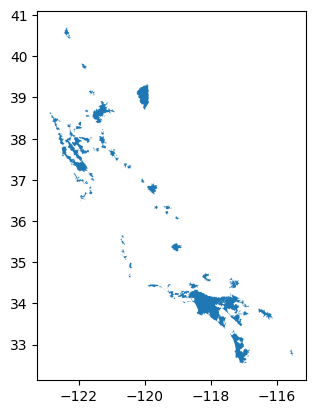

In [27]:
ca_uza.plot()

## Area 3 - Volunteer Reporters
>E: The third area is that I noticed that it was mentioned in Section H that voluntary reports may help a state receive more money. Given this helpful piece of information, I had 3 follow-up ideas. 
>1. Can we figure out how it helps increase funding by being a voluntary reporter 
>2. Can we do an audit to see which agencies aren’t reporters that maybe could be and 
>3. What monetary benefit could be gained if we helped these agencies become voluntary reporters.

>K: would auditing this entail simply looking at organizations that don’t have an NTD ID? Or something else?

>E: Yes, I think we would look at all transit agencies in the transit database that operate fixed route service that don’t appear to have an NTD ID and are not present in NTD data.

In [14]:
dim_orgs = (tbls.mart_transit_database.dim_organizations()
                    >> filter(_._is_current == True,
                              _.ntd_id.isna()
                             )
                    >> collect()
                   )
dim_orgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype              
---  ------                                  --------------  -----              
 0   key                                     1186 non-null   object             
 1   source_record_id                        1186 non-null   object             
 2   name                                    1186 non-null   object             
 3   organization_type                       1186 non-null   object             
 4   roles                                   1186 non-null   object             
 5   itp_id                                  167 non-null    float64            
 6   details                                 186 non-null    object             
 7   caltrans_district                       508 non-null    object             
 8   website                                 1151 non-null   object             
 9

In [15]:
dim_orgs.head()

,key,source_record_id,name,organization_type,roles,itp_id,details,caltrans_district,website,reporting_category,hubspot_company_record_id,gtfs_static_status,gtfs_realtime_status,_deprecated__assessment_status,manual_check__contact_on_website,alias,is_public_entity,ntd_id,ntd_id_2022,public_currently_operating,public_currently_operating_fixed_route,_is_current,_valid_from,_valid_to
0,eea7326fc87a575ce26e24cf56b8ff37,recsupkiKC6Y6fFfV,DAV,Non-Profit Organization,[],NaN,DAV operates a fleet of vehicles around the co...,11 - San Diego,https://www.dav.org/veterans/i-need-a-ride/,None,None,Static OK,RT Incomplete,False,Unknown,[Disabled Veterans of America],False,None,None,False,False,True,2023-05-25 00:00:00+00:00,2098-12-31 23:59:59.999999+00:00
1,45227f9806ad4ffd1e8d4309e07f707e,recmCZYY7aXn5MS9b,IBI,Company,[],NaN,None,None,https://www.ibigroup.com/,None,None,Static OK,RT Incomplete,False,Unknown,[],False,None,None,False,False,True,2024-05-04 00:00:00+00:00,2098-12-31 23:59:59.999999+00:00
2,8a644e497439d25c01619c8ec6c85c44,recEN9M5vpVOk2JRI,SAP,Company,[],NaN,None,None,crystalreports.com,None,None,Static OK,RT Incomplete,False,Unknown,[],False,None,None,False,False,True,2023-04-29 00:00:00+00:00,2098-12-31 23:59:59.999999+00:00
3,fa22729bf0698cc6d2ac4f4a41e861b0,recIAaOHjseoeNpTx,UTA,Company,[],NaN,None,None,http://www.utatransit.net/,None,None,Static OK,RT Incomplete,False,Unknown,[],False,None,None,False,False,True,2023-04-29 00:00:00+00:00,2098-12-31 23:59:59.999999+00:00
4,3fd4d81306c49cb718c37b48fcbe585c,recveQ8PTsiKdT7RU,Aina,Company,[],NaN,Offices in Boston and Finland; no CA offices,None,https://www.ainaptt.com/,None,None,Static OK,RT Incomplete,False,Unknown,[],False,None,None,False,False,True,2023-05-25 00:00:00+00:00,2098-12-31 23:59:59.999999+00:00
